In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tabula
import glob

In [3]:
def plot_corr(data):
    '''
    Plot correlation 
    
    Args:
    - data: pd dataframe
    
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(5, 5))
        ax = sns.heatmap(corr, square=True, cmap='RdBu_r', center=0)


In [4]:
magnetic_pdf = os.path.join(os.path.dirname(os.getcwd()), '../Data/Raw_data/MagneticMethods_Report.pdf')

In [10]:
tables = tabula.read_pdf(magnetic_pdf, pages=[10,11,12,13], lattice=True, pandas_options={'header':1})

In [11]:
table_names_boxplot = ['pipe_CF_g', 'pipe_CF_ug', 'pipe_perm_g', 'pipe_perm_ug', 'pipe_MBN_g', 'pipe_MBN_ug',\
              'CF', 'perm', 'MBN', 'CF', 'perm', 'MBN']

In [12]:
hard_ref = tabula.read_pdf(magnetic_pdf, pages=[5], lattice=True)[0] #get the reference hardness table

In [13]:
#Cleaning tables
for i, df in enumerate(tables):
    df.drop(0, inplace=True)
    df.rename(columns = {'Unnamed: 0':'Sample'}, inplace=True)
    
    if i in range(6,9):
        df.Sample = df.Sample.str.replace('P91', 'T')
        
    if i >= 9:
        df.Sample = df.Sample.str.replace('B', 'T_B')
    #TODO change names of samples
    #df.index = hard_ref.Condition.tolist()
    #df[['Sample_ID', 'Abbreviation']] = hard_ref[['Condition', 'Pipe short name']].values
    df.Sample = df.Sample.str.replace('91', '')
    df.set_index(df.iloc[:,0], inplace=True, drop=True)
    df.drop('Sample', axis=1, inplace=True)


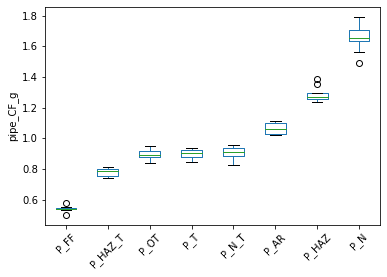

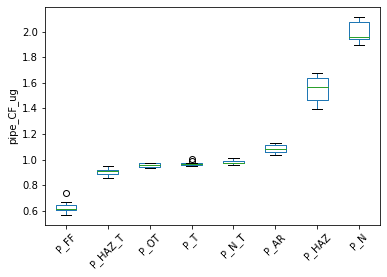

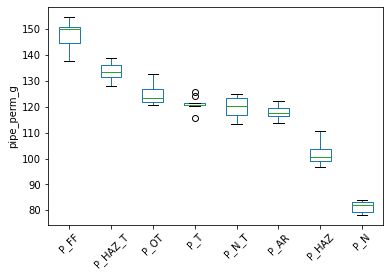

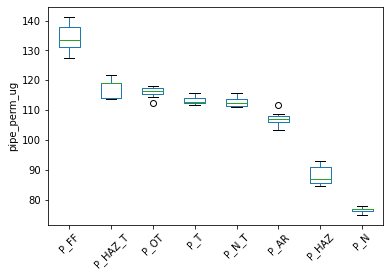

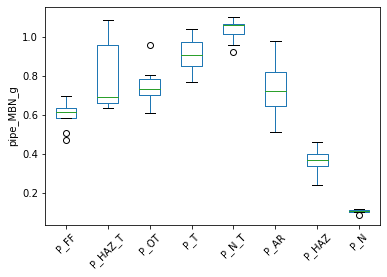

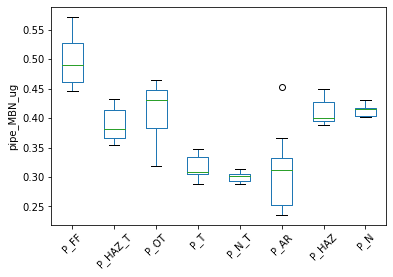

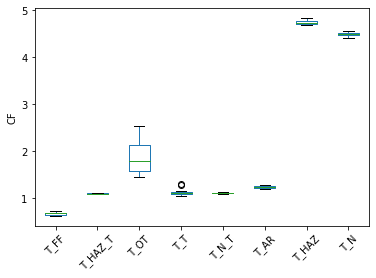

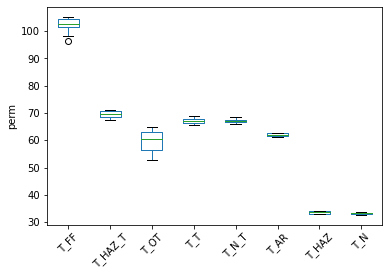

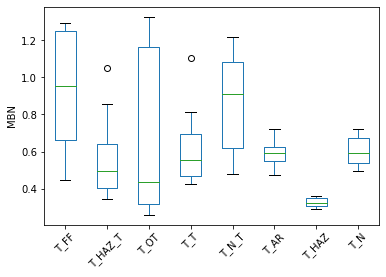

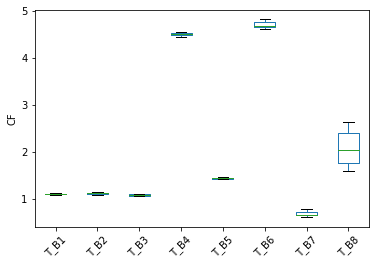

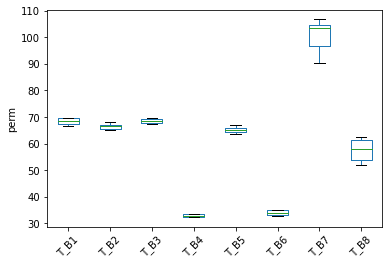

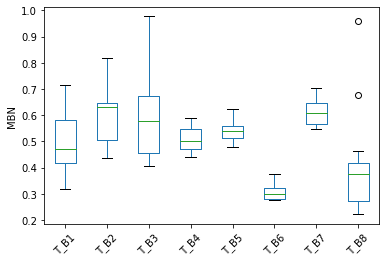

In [14]:
#boxplot
for table, name in zip(tables, table_names_boxplot):
    data = table.transpose().astype('float')
    data.plot.box(rot=45, ylabel=name)

In [15]:
median_all_tubes = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/TUBE_magnetic_param_median.csv'))

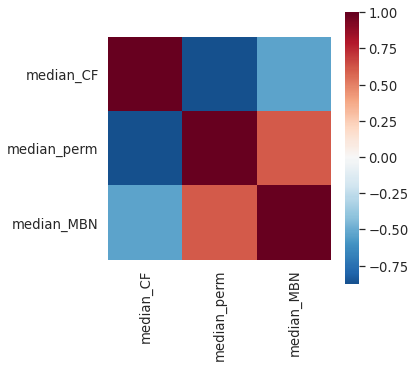

In [16]:
plot_corr(median_all_tubes)

In [18]:
median_g_pipes = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Cleaned_data/PIPE_magnetic_param_median.csv'))

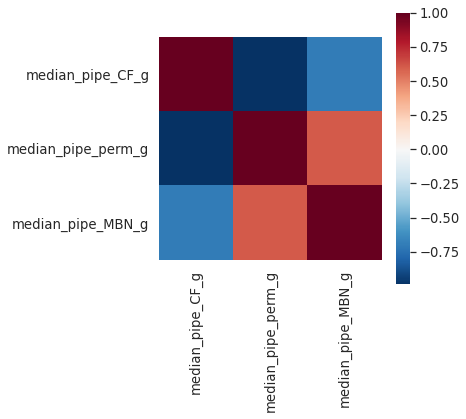

In [20]:
plot_corr(median_g_pipes)